In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load train and test data
data = pd.read_csv('data.csv')
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

## Les tests pour la data initiale

In [ ]:
ts_data=train_data["total_demand(mw)"]

In [25]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.05:
        print("=> La série est stationnaire selon le test ADF (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).\n")

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)
    
    if kpsstest[1] < 0.05:
        print("=> La série n'est PAS stationnaire selon le test KPSS (p-value < 0.05).\n")
    else:
        print("=> La série est stationnaire selon le test KPSS (p-value >= 0.05).\n")

def pp_test(timeseries):
    print('Results of PP Test:')
    pptest = adfuller(timeseries, regression='ct', autolag='AIC')
    dfoutput = pd.Series(pptest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in pptest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if pptest[1] < 0.05:
        print("=> La série est stationnaire selon le test PP (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test PP (p-value >= 0.05).\n")
adf_test(ts_data)
kpss_test(ts_data)
pp_test(ts_data)

Results of Dickey-Fuller Test:
Test Statistic                   -2.806991
p-value                           0.057282
#Lags Used                       23.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.434743
Critical Value (5%)              -2.863480
Critical Value (10%)             -2.567803
dtype: float64
=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).

Results of KPSS Test:
Test Statistic            0.306275
p-value                   0.100000
#Lags Used               25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                   -2.872973
p-value                           0.171433
#Lags Used                       23.000000
Number of Observations Used    1491.000000
Critical Value (1%)              -3.96

C:\Users\Idea\AppData\Local\Temp\ipykernel_29896\3464870497.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


In [23]:
# Différencier la série une fois
ts_data_diff = ts_data.diff().dropna()

# Effectuer le test ADF sur la série différenciée
adf_test(ts_data_diff)

Results of Dickey-Fuller Test:
Test Statistic                -9.194083e+00
p-value                        2.085345e-15
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64


## les tests pour la serie différencié

In [27]:
ts_data=ts_data_diff
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if dftest[1] < 0.05:
        print("=> La série est stationnaire selon le test ADF (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test ADF (p-value >= 0.05).\n")

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)
    
    if kpsstest[1] < 0.05:
        print("=> La série n'est PAS stationnaire selon le test KPSS (p-value < 0.05).\n")
    else:
        print("=> La série est stationnaire selon le test KPSS (p-value >= 0.05).\n")

def pp_test(timeseries):
    print('Results of PP Test:')
    pptest = adfuller(timeseries, regression='ct', autolag='AIC')
    dfoutput = pd.Series(pptest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in pptest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    if pptest[1] < 0.05:
        print("=> La série est stationnaire selon le test PP (p-value < 0.05).\n")
    else:
        print("=> La série n'est PAS stationnaire selon le test PP (p-value >= 0.05).\n")
adf_test(ts_data)
kpss_test(ts_data)
pp_test(ts_data)

Results of Dickey-Fuller Test:
Test Statistic                -9.194083e+00
p-value                        2.085345e-15
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)           -3.434743e+00
Critical Value (5%)           -2.863480e+00
Critical Value (10%)          -2.567803e+00
dtype: float64
=> La série est stationnaire selon le test ADF (p-value < 0.05).

Results of KPSS Test:
Test Statistic             0.136847
p-value                    0.100000
#Lags Used               290.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
=> La série est stationnaire selon le test KPSS (p-value >= 0.05).

Results of PP Test:
Test Statistic                -9.191650e+00
p-value                        1.344408e-13
#Lags Used                     2.200000e+01
Number of Observations Used    1.491000e+03
Critical Value (1%)        

C:\Users\Idea\AppData\Local\Temp\ipykernel_29896\3552742558.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


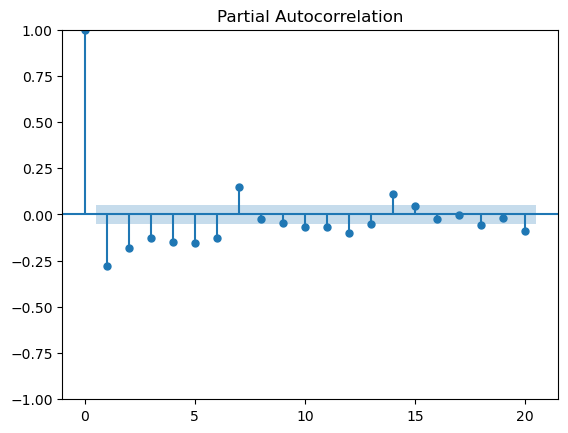

In [28]:
plot_pacf(ts_data_diff, lags=20)
plt.show()

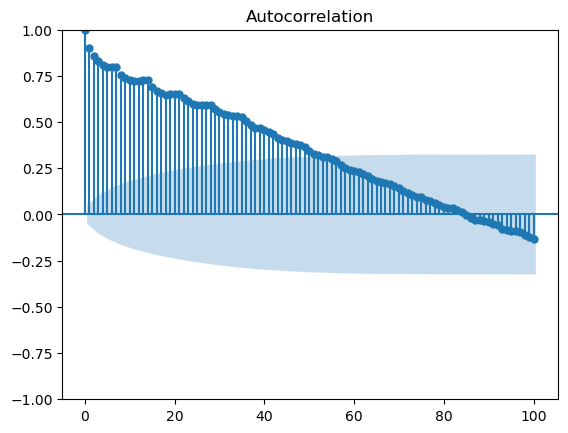

In [9]:
plot_acf(train_data['total_demand(mw)'], lags=100)
plt.show()

In [10]:
# Ajuster le modèle ARIMA pour PV_production
model_pv = ARIMA(train_data['total_demand(mw)'], order=(2, 0, 0))
model_pv_fit = model_pv.fit()
print(model_pv_fit.summary())

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       total_demand(mw)   No. Observations:                 1515
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -11934.470
Date:                Tue, 08 Apr 2025   AIC                          23876.940
Time:                        09:46:41   BIC                          23898.233
Sample:                             0   HQIC                         23884.868
                               - 1515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.013e+04    241.779     41.890      0.000    9654.246    1.06e+04
ar.L1          0.6850      0.016     41.689      0.000       0.653       0.717
ar.L2          0.2430      0.017     14.269      0.0

c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Idea\anaconda3\envs\TensorFlow\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


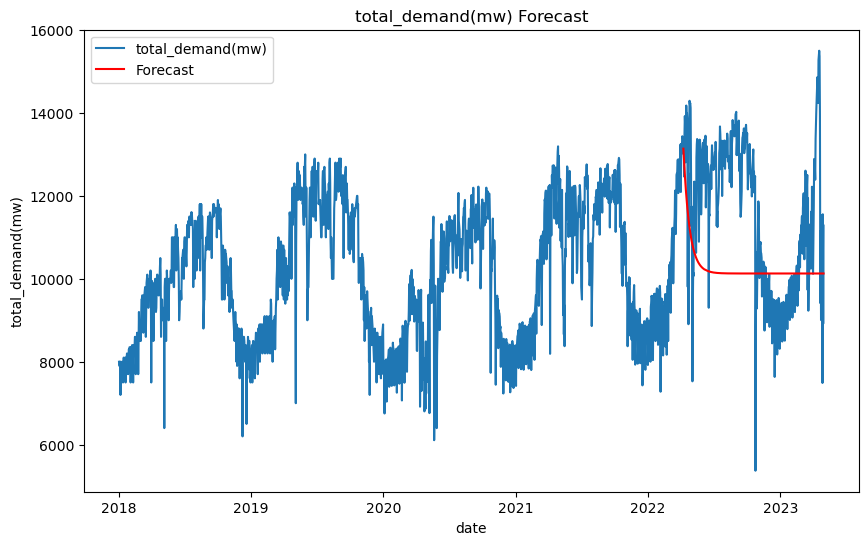

In [13]:
# Faire des prévisions pour PV_production
forecast_pv = model_pv_fit.forecast(steps=len(test_data)) 
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['total_demand(mw)'], label='total_demand(mw)')
plt.plot(test_data.index, forecast_pv, label='Forecast', color='red')
plt.xlabel('date')
plt.ylabel('total_demand(mw)')
plt.title('total_demand(mw) Forecast')
plt.legend()
plt.show()

Since the data clearly exhibits seasonality, it's evident that the ARIMA model might not yield the best results. Let's try using the SARIMA model instead.